In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [13]:
data = pd.read_table("human_data.txt")
data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Using Kmers

In [14]:
def kmers(sequence, size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [15]:
data['tokens'] = data.apply(lambda x: kmers(x['sequence']),axis=1)

In [ ]:
data.head()

Preprocessing

In [17]:
data.drop('sequence',axis=1,inplace=True)

In [18]:
data.head()

,class,tokens
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [24]:
print(data['tokens'][0])
print("\n\n\n")
print(len(data['tokens'][0]))
print(len(data['tokens'][1]))

['atgccc', 'tgcccc', 'gcccca', 'ccccaa', 'cccaac', 'ccaact', 'caacta', 'aactaa', 'actaaa', 'ctaaat', 'taaata', 'aaatac', 'aatact', 'atacta', 'tactac', 'actacc', 'ctaccg', 'taccgt', 'accgta', 'ccgtat', 'cgtatg', 'gtatgg', 'tatggc', 'atggcc', 'tggccc', 'ggccca', 'gcccac', 'cccacc', 'ccacca', 'caccat', 'accata', 'ccataa', 'cataat', 'ataatt', 'taatta', 'aattac', 'attacc', 'ttaccc', 'tacccc', 'accccc', 'ccccca', 'ccccat', 'cccata', 'ccatac', 'catact', 'atactc', 'tactcc', 'actcct', 'ctcctt', 'tcctta', 'ccttac', 'cttaca', 'ttacac', 'tacact', 'acacta', 'cactat', 'actatt', 'ctattc', 'tattcc', 'attcct', 'ttcctc', 'tcctca', 'cctcat', 'ctcatc', 'tcatca', 'catcac', 'atcacc', 'tcaccc', 'caccca', 'acccaa', 'cccaac', 'ccaact', 'caacta', 'aactaa', 'actaaa', 'ctaaaa', 'taaaaa', 'aaaaat', 'aaaata', 'aaatat', 'aatatt', 'atatta', 'tattaa', 'attaaa', 'ttaaac', 'taaaca', 'aaacac', 'aacaca', 'acacaa', 'cacaaa', 'acaaac', 'caaact', 'aaacta', 'aactac', 'actacc', 'ctacca', 'taccac', 'accacc', 'ccacct', 'caccta',

NLP

In [63]:
texts = list(data['tokens'])
print(len(texts))
print(len(texts[1]))


4380
676


In [64]:
for i in range(len(texts)):
    texts[i] = " ".join(texts[i])

In [72]:
texts[1]

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatctg atctgt tctgtt ctgttc tgttcg gttcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattca attcat ttcatt tcattg cattgc attgcc ttgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggcc aggcct ggccta gcctac cctacc ctaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtactg tactga actgat ctgatc tgatca gatcat atcatt tcattc cattct attcta ttctat tctatt ctattt tatttc atttcc tttccc ttcccc tccccc ccccct cccctc ccctct cctcta ctctat tctatt ctattg tattga attgat ttgatc tgatcc gatccc atcccc tcccca ccccac cccacc ccacct cacctc acctcc cctcca ctccaa tccaaa ccaaat caaata aaatat aatatc atatct tatctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatc taatca aatcac atcacc tcacca caccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gacta

In [80]:
y_data = data.iloc[:,0].values

In [81]:
len(y_data)

4380

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X_data = cv.fit_transform(texts)

In [85]:
print(X_data.shape)

(4380, 232414)


<AxesSubplot:>

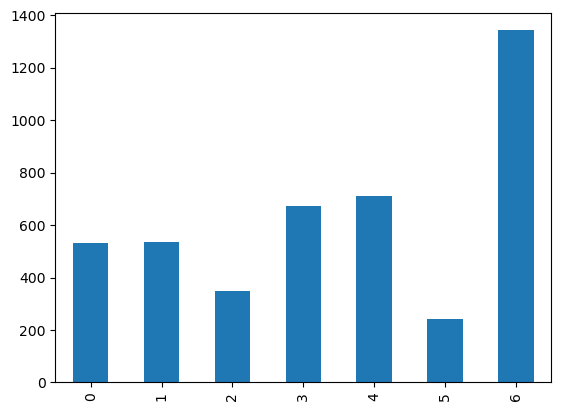

In [93]:
data['class'].value_counts().sort_index().plot.bar()

Splitting data to apply classifier

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=12345)

In [95]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [96]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [97]:
y_pred = classifier.predict(X_test)

Check accuracy

In [100]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
print("Confusion matrix")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Prediction")))

Confusion matrix
Prediction    0   1   2    3    4   5    6
Actual                                    
0           112   0   0    1    1   0    1
1             0  97   0    0    0   0    3
2             0   0  71    0    0   0    1
3             0   0   0  136    1   0    1
4             4   0   0    0  127   0    7
5             0   0   0    0    0  50    0
6             1   0   0    0    0   0  262


In [103]:
def get_metrics(y_test,y_prediction):
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average = "weighted")
    recall = recall_score(y_test,y_pred, average = "weighted")
    f1 = f1_score(y_test,y_pred, average = "weighted")
    return accuracy,precision,recall,f1

In [104]:
accuracy,precision,recall,f1 = get_metrics(y_test,y_pred)

In [105]:
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.976 
precision = 0.977 
recall = 0.976 
f1 = 0.976
